In [36]:
import yfinance as yf 
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [37]:
#define variables
FAST_MA = 50
SLOW_MA = 200
STARTING_BALANCE = 10000

In [38]:
#define time period
START = datetime.datetime(2005, 1, 1)
END = datetime.datetime(2015, 1, 1)
YEARS = (END - START).days / 365.25

In [39]:
price = yf.download(
    '^GSPC',
    start=START,
    end=END,
    progress=False,
    auto_adjust=False 
)

if isinstance(price.columns, pd.MultiIndex):
    price.columns = price.columns.get_level_values(0)

styled_head = price.head().style \
    .format({
        'Open': '{:,.2f}', 'High': '{:,.2f}', 'Low': '{:,.2f}', 
        'Close': '{:,.2f}', 'Adj Close': '{:,.2f}', 'Volume': '{:,.0f}'
    }) \
    .set_table_styles([
        {'selector': 'th', 'props': [('font-weight', 'bold'), ('text-align', 'left')]},
        {'selector': 'td', 'props': [('text-align', 'right')]}
    ]) \
    .set_caption("S&P 500 Data Preview")

display(styled_head)


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2005-01-03 00:00:00,"1,202.08","1,202.08","1,217.80","1,200.32","1,211.92","1,510,800,000"
2005-01-04 00:00:00,"1,188.05","1,188.05","1,205.84","1,185.39","1,202.08","1,721,000,000"
2005-01-05 00:00:00,"1,183.74","1,183.74","1,192.73","1,183.72","1,188.05","1,738,900,000"
2005-01-06 00:00:00,"1,187.89","1,187.89","1,191.63","1,183.27","1,183.74","1,569,100,000"
2005-01-07 00:00:00,"1,186.19","1,186.19","1,192.20","1,182.16","1,187.89","1,477,900,000"


In [40]:
price = price[['Open', 'Close']]
price.head()

Price,Open,Close
Date,,
2005-01-03,1211.920044,1202.079956
2005-01-04,1202.079956,1188.050049
2005-01-05,1188.050049,1183.739990
2005-01-06,1183.739990,1187.890015
2005-01-07,1187.890015,1186.189941


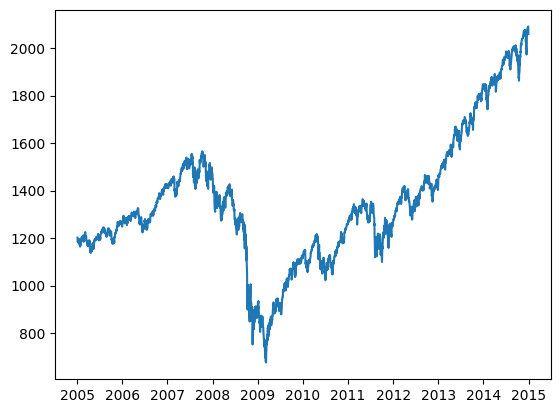

In [41]:
#plot chart
plt.plot(price.Close)
plt.show()

In [42]:
#calculate daily return
price['Return'] = price.Close / price.Open

price['Bench_Bal'] = STARTING_BALANCE * price.Return.cumprod()

price.tail()

Price,Open,Close,Return,Bench_Bal
Date,,,,
2014-12-24,2083.250000,2081.879883,0.999342,18430.344448
2014-12-26,2084.300049,2088.770020,1.002145,18469.869995
2014-12-29,2087.629883,2090.570068,1.001408,18495.882673
2014-12-30,2088.489990,2080.350098,0.996102,18423.794945
2014-12-31,2082.110107,2058.899902,0.988853,18218.416729


In [43]:
#calculate metrics
bench_return = round(((price.Bench_Bal.iloc[-1] / price.Bench_Bal.iloc[0]) - 1) * 100, 2)
bench_cagr = round((((price.Bench_Bal.iloc[-1] / price.Bench_Bal.iloc[0]) ** (1 / YEARS)) - 1) * 100, 2)

print(f"Benchmark Total Return: {bench_return}%")
print(f"Benchmark CAGR: {bench_cagr}%")

Benchmark Total Return: 83.68%
Benchmark CAGR: 6.27%


In [44]:
#calculate moving averages
price['Fast_MA'] = price.Close.rolling(window = FAST_MA).mean()
price['Slow_MA'] = price.Close.rolling(window = SLOW_MA).mean()

price.tail()

Price,Open,Close,Return,Bench_Bal,Fast_MA,Slow_MA
Date,,,,,,
2014-12-24,2083.250000,2081.879883,0.999342,18430.344448,2019.272600,1953.167598
2014-12-26,2084.300049,2088.770020,1.002145,18469.869995,2023.798201,1954.379748
2014-12-29,2087.629883,2090.570068,1.001408,18495.882673,2028.354402,1955.626948
2014-12-30,2088.489990,2080.350098,0.996102,18423.794945,2032.226204,1956.734549
2014-12-31,2082.110107,2058.899902,0.988853,18218.416729,2035.324001,1957.667798


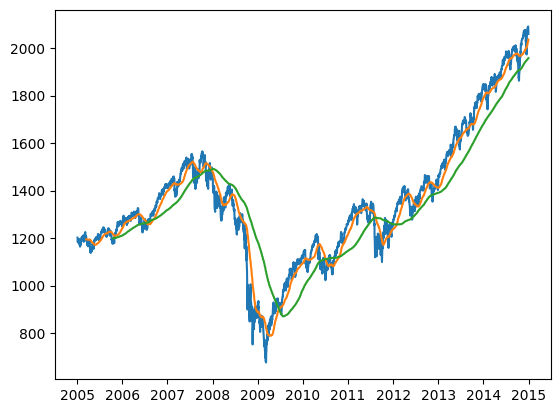

In [45]:
#draw graph
plt.plot(price.Close)
plt.plot(price.Fast_MA)
plt.plot(price.Slow_MA)

plt.show()